In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [5]:
dt=pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv",sep=",")
print(dt)

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0       

In [6]:
feature_cols=["YearsAtCompany","Age","TotalWorkingYears"]
feature=dt[feature_cols]
target=dt.Attrition

In [7]:
logr=DecisionTreeClassifier()
logr.fit(feature,target)

DecisionTreeClassifier()

In [8]:
d=int(input("Enter your working years in this company:"))
e=int(input("Enter your age:"))
f=int(input("Enter your total working years:"))
p=logr.predict([[d,e,f]])
if p=='Yes':
  print("YES")
else:
  print("NO")

Enter your working years in this company:8
Enter your age:45
Enter your total working years:16
NO


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [9]:
from sklearn.tree import export_graphviz,plot_tree

[Text(0.24879060906163555, 0.9782608695652174, 'x[2] <= 1.5\ngini = 0.27\nsamples = 1470\nvalue = [1233, 237]'),
 Text(0.05359612724757953, 0.9347826086956522, 'x[1] <= 33.5\ngini = 0.5\nsamples = 92\nvalue = [47, 45]'),
 Text(0.03803596127247579, 0.8913043478260869, 'x[1] <= 26.5\ngini = 0.495\nsamples = 80\nvalue = [36, 44]'),
 Text(0.019363762102351315, 0.8478260869565217, 'x[2] <= 0.5\ngini = 0.462\nsamples = 47\nvalue = [17, 30]'),
 Text(0.008298755186721992, 0.8043478260869565, 'x[1] <= 20.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.005532503457814661, 0.7608695652173914, 'x[1] <= 18.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.0027662517289073307, 0.717391304347826, 'gini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.008298755186721992, 0.717391304347826, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.011065006915629323, 0.7608695652173914, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.030428769017980636, 0.8043478260869565, 'x[1] <= 21.5\ngini =

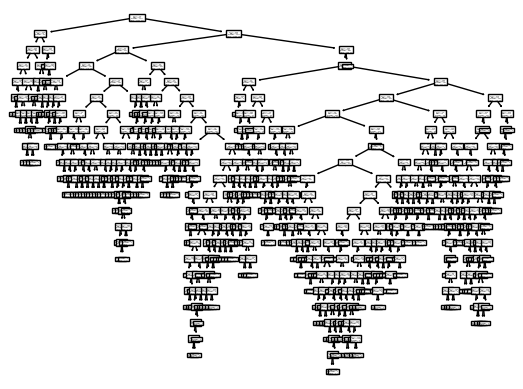

In [10]:
plot_tree(logr)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
lr=RandomForestClassifier(n_estimators=60)
lr.fit(feature,target)

RandomForestClassifier(n_estimators=60)

In [13]:
1d=int(input("Enter your working years in this company:"))
e=int(input("Enter your age:"))
f=int(input("Enter your total working years:"))
p=lr.predict([[d,e,f]])
if(p=='Yes1'):
  print("GOOD")
else:
  print("BAD")

Enter your working years in this company:8
Enter your age:45
Enter your total working years:16
BAD


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [14]:
import os
output_dir="tree visualisations"
os.makedirs(output_dir,exist_ok=True)

In [15]:
for i,tree in enumerate(lr.estimators_):
  tree_dot_file=os.path.join(output_dir,f"tree_{i}.dot")
  tree_png_file=os.path.join(output_dir,f"tree_{i}.png")

In [16]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file=tree_dot_file , feature_names=["YearsAtCompany","Age","TotalWorkingYears"],
                class_names=[str(cls) for cls in lr.classes_], filled=True, rounded=True)

In [17]:
command= f"dot -Tpng {tree_dot_file} -o {tree_png_file}"
os.system(command)
print(f"Tree {i} visualization saved to {tree_png_file}")

Tree 59 visualization saved to tree visualisations/tree_59.png
